# Tutorial 6  Non-Linear Dimensionality Reduction

In [6]:
print(__doc__)

from time import time

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import matplotlib.image as mpimg

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets,neighbors
from sklearn.datasets import load_digits

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
n_neighbors = 10
n_components = 2

Automatically created module for IPython interactive environment


In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Today:

<ul>
 <li> Recap on LLE </li>
 <li> The t-SNE algorithm </li>
 <li> Demonstartions - LLE,MDS,ISOMAP,t-SNE </li>
 </ul>

# Locally linear embedding (LLE) 
Dimensionality reduction method - computes a low-dimensional, neighbourhood preserving embedding of high-dimensional data.
<ul>
 <li> Identify the neighbours of each data point $x_i$ . This can be done by finding the $k$
nearest neighbours, or by choosing all points within some fixed radius, $\epsilon$.
 </li>
 <li> Compute the weights that best linearly reconstruct $x_i$
from its neighbours 
$$
\min _w {\sum_{i=1}^n \left\lVert x_i - \sum _{j=1}^k w_{ij} x_{N_i(j)}\right\lVert}^2
$$
where N_i(j) is the index of the $j_{th}$ neighbour of the $i_{th}$ point.
</li>
 <li> 
 Define the local covariance matrix $$C_i=(C_{jk})_{j,k∈N(i)}=(x_i-x_j)(x_i-x_k)$$.
 
 The solution is given by: $$ w_i = \mu (C_i)^-1 1 $$ 
 The constant $\mu$  is chosen so that $$\sum w_i =1$$
</li>

 <li>  Find the low-dimensional embedding vector $y_i$ which is best reconstructed by the
weights determined in the previous step.
$$
\min _Y {\sum_{i=1}^n \left\lVert y_i - \sum _{j=1}^k w_{ij} y_{N_i(j)}\right\lVert}^2
$$

This objective can be reformulated as
$$
\min _Y {Trace(Y^TYL)}
$$
Where $L= (I − W)^T(I − W)$
 </li>
 <li> The cost function can be optimized initially by the second of these two constraints. Under this constraint, the cost is minimized when the columns of $Y^T$ (rows of Y ) are the **eigenvectors** associated with the **lowest eigenvalues of L**.
Discarding the eigenvector associated with eigenvalue 0 satisfies the first constraint.</li>
 </ul>

# t-Distributed Stochastic Neighbor Embedding (t-SNE)

1. Prize-winning technique for dimensionality reduction.
2. Particularly well suited for the visualization of high-dimensional datasets. 
3. many scales


# Examples

20 news group - acollection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups

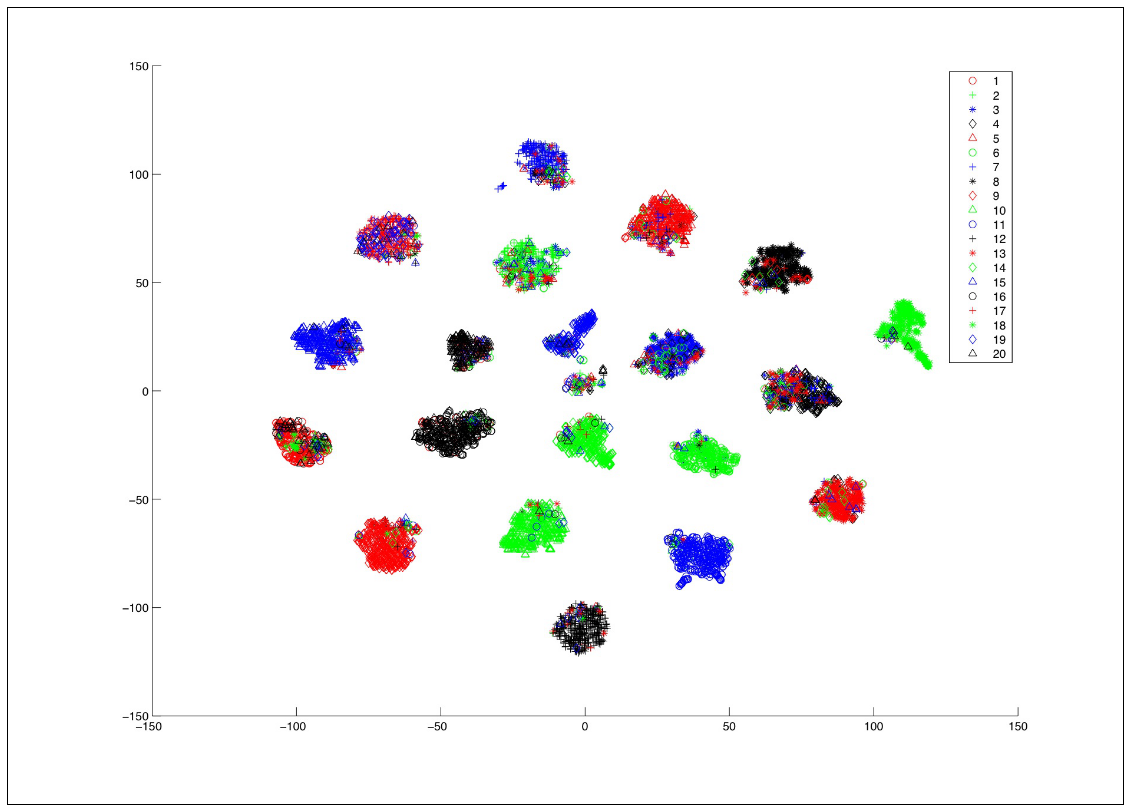

In [9]:
figure(figsize = (20,20))
img=mpimg.imread('20news_tsne.jpg')
imgplot = plt.imshow(img)
plt.xticks([]); plt.yticks([])
plt.show()

Deep reinforcemnt learning

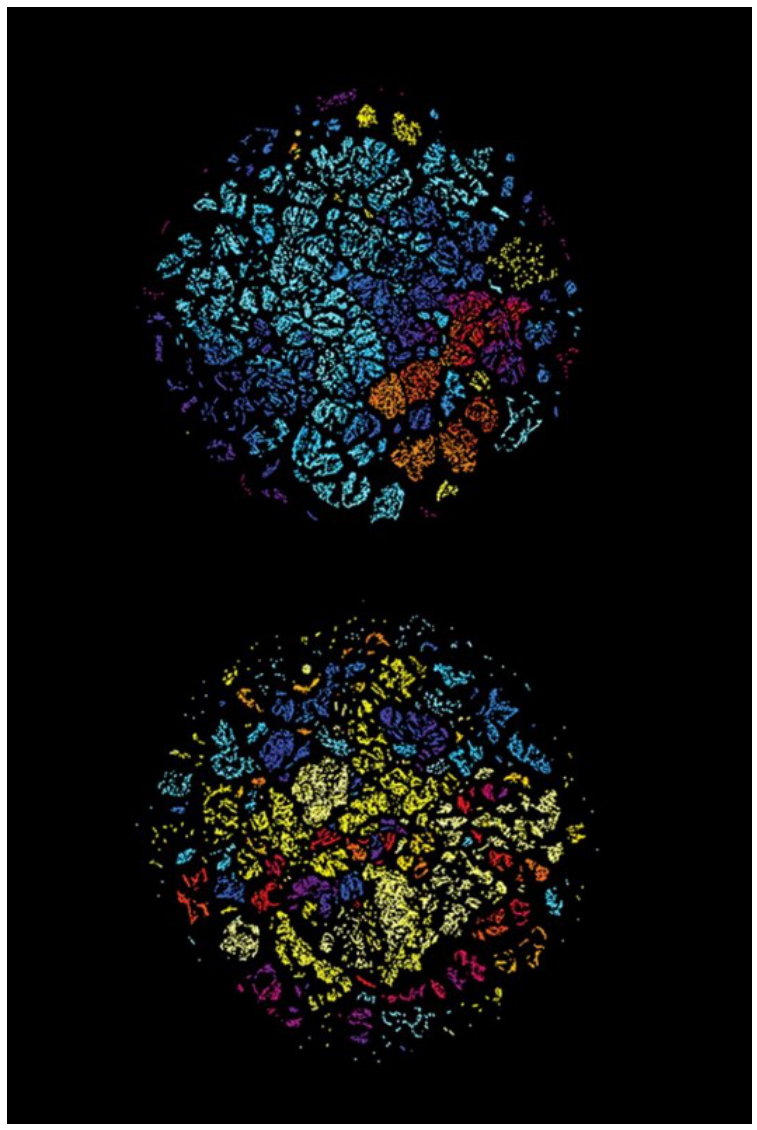

In [10]:
figure(figsize = (20,20))
img=mpimg.imread('Picture1.jpg')
imgplot = plt.imshow(img)
plt.xticks([]); plt.yticks([])
plt.show()

# The t-SNE algorithm

**Input:**
 <ul>
 <li> Data set $X_{m*n}$ </li>
 <li> Perplexity </li>
 <li> Optimization parameters - number of iteration T, learning rate $\eta$, momentum $\alpha(t)$ </li>
 </ul>
 
**Output:**        
<ul>
<li> Low dimensional data representation $Y_{k*n}$ </li>
</ul>

**Begin:**
1. Compute affinity matrix $$ P_{j|i} = \frac{e^{- \frac{\left\lVert x_i -x_j \right\rVert ^2}{2\sigma _i ^2} }}{\sum_n e^{- \frac{\left\lVert x_i -x_n \right\rVert ^2}{2\sigma _i ^2} }} $$

    notice that we have a different $ {\sigma_i} $ for each point- taking into account the density of the points in space

2. Set $P_{ii}=0$ and $$P_{ij} = \frac{P_{i|j}+P_{j|i}}{2n}$$
3. Sample random initiation $Y_{k*n}$
4. for t = 1 to T do
     <ul>
        <li>Compute low dimensional affinities $Q_{ii} = 0$ and $$ Q_{ij} = \frac{ (1+\left\lVert y_i -y_j \right\rVert ^2)^{-1} }{\sum_{n \ne i}  (1+\left\lVert y_i -y_n \right\rVert ^2)^{-1}} $$.</li>
        <li>Compute gradient: $$Cost = KL(P||Q) = \sum P_{ij} \log{ \frac{P_{ij}}{Q_{ij}}} $$ $$\frac{\delta Cost}{\delta y_i} = 4\sum _j (P_{ij}-Q_{ij})(y_i-y_j)(1+\left\lVert y_i -y_j \right\rVert ^2)^{-1}$$</li>
       
        <li>Gradient step: $$Y^t = Y^{t-1}+\eta\frac{\delta Cost}{\delta Y} + \alpha (t) (Y^{t-1}-Y^{t-2})$$.</li>
    </ul>
    
  end
  
  
**End**

# The student t distribution

Consider a N dimensional ball of radius $r$. Its volume scales as $r^N$. When N is large, if we pick random points uniformly in the ball, most points will be close to the surface, and less will be near the center.

This is illustrated by the following simulation, showing the distribution of the distances of these points, for different dimensions.

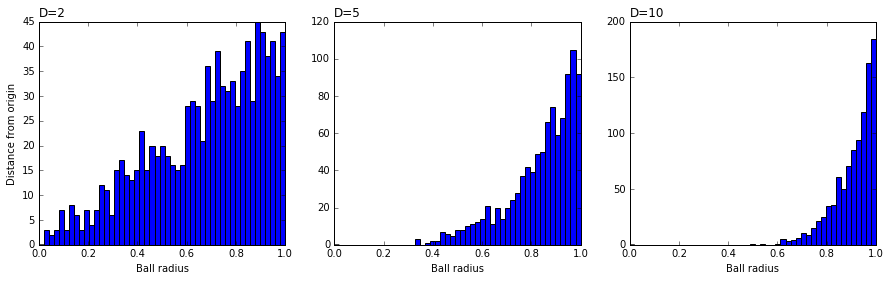

In [11]:
npoints = 1000
plt.figure(figsize=(15, 4))
for i, D in enumerate((2, 5, 10)):
    # Normally distributed points.
    u = np.random.randn(npoints, D) #each point of dimension D
    # Now on the sphere.
    u /= norm(u, axis=1)[:, None]
    # Uniform radius.
    r = np.random.rand(npoints, 1)
    # Uniformly within the ball.
    points = u * r**(1./D)
    # Plot.
    ax = plt.subplot(1, 3, i+1)
    ax.set_xlabel('Ball radius')
    if i == 0:
        ax.set_ylabel('Distance from origin')
    ax.hist(norm(points, axis=1),
            bins=np.linspace(0., 1., 50))
    ax.set_title('D=%d' % D, loc='left')

When reducing the dimensionality of a dataset, if we used the same Gaussian distribution for the data points and the map points, we would get an imbalance in the distribution of the distances of a point's neighbors - the crowding problem(clusters of points overlap each other). This is because the distribution of the distances is so different between a high-dimensional space and a low-dimensional space. Yet, the algorithm tries to reproduce the same distances in the two spaces. This imbalance would lead to an excess of attraction forces and a sometimes unappealing mapping. This is actually what happens in many linear and non-linear methods.

The t-SNE algorithm works around this problem by using a t-Student with one degree of freedom (or Cauchy) distribution for the map points. This distribution has a much heavier tail than the Gaussian distribution, which compensates the original imbalance. For a given similarity between two data points, the two corresponding map points will need to be much further apart in order for their similarity to match the data similarity. This can be seen in the following plot.

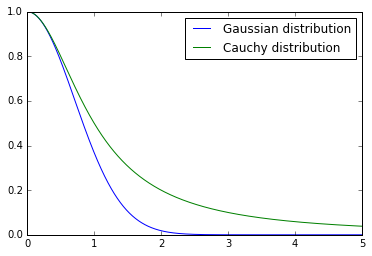

In [13]:
z = np.linspace(0., 5., 1000)
gauss = np.exp(-z**2)
cauchy = 1/(1+z**2)
plt.plot(z, gauss, label='Gaussian distribution')
plt.plot(z, cauchy, label='Cauchy distribution')
plt.legend()
plt.show()

# The cost function

Recall that our goal is to find a low dimesional represantation $Y$ of the high dimensional data $X$.
Similar to MDS, we defined the distances matrix.
Then, we defined a probability measure on the distance matrix both in the high and low dimensions.

Now, instead of minizimng the norm of the distnace between these distances, we will minimize the KL divergence between the probabilty matrices.

$$Cost = KL(P||Q) = \sum P_{ij} \log{ \frac{P_{ij}}{Q_{ij}}} = \sum_i \sum_j P_{ij} \log{ P_{ij}} - P_{ij} \log{ Q_{ij}}$$

# Optimization

So far we saw:
<ul>
 <li> Linear and no linear problems </li>
 <li> Convex problems </li>
 <li> Closed form solution </li>
 </ul>
 
 However, the t-SNE cost function is:
 <ul>
 <li> Non linear </li>
 <li> Non convex </li>
 <li> No closed form </li>
 </ul>
 
 We solve the problem using **the gradient descent algorithm**.
 
Since the problem is **non-convex** we are only guaranteed to converge for a **local optima**.
 
 In practice, the results are good.

# Gradient descent on a nutshell

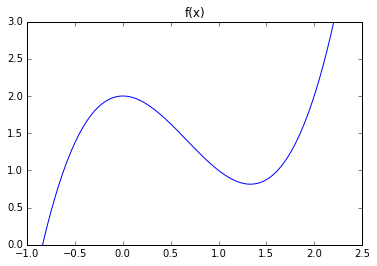

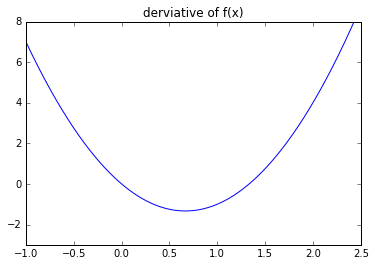

In [14]:
f = lambda x: x**3-2*x**2+2

# returns the value of the derivative of our function
def f_prime(x):
    return 3*x**2-4*x

x = np.linspace(-1,2.5,1000)
plt.title('f(x)')
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

plt.plot(x,f_prime(x))
plt.xlim([-1,2.5])
plt.ylim([-3,8])
plt.title('derviative of f(x)')
plt.show()

Local minimum occurs at: 1.33342535085
Number of steps: 17


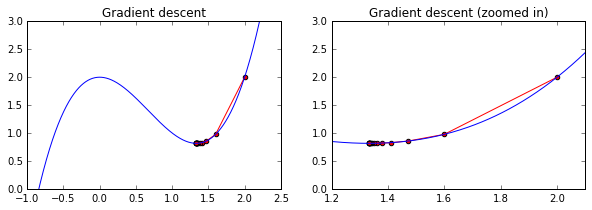

In [15]:
x_old = 0
x_new = 2 # The algorithm starts at x=2
n_k = 0.1 # step size
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]

 
while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
print "Local minimum occurs at:", x_new
print "Number of steps:", len(x_list)

plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.title("Gradient descent")
plt.subplot(1,2,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.2,2.1])
plt.ylim([0,3])
plt.title("Gradient descent (zoomed in)")
plt.show()

http://vis.supstat.com/2013/03/gradient-descent-algorithm-with-r/

# Gradient derivation


Notation:
Define: 
$$ d_{ij} = \left\lVert y_i -y_j \right\rVert $$

$$ Z = \sum _{k \ne l}(1+d_{kl}^{2})^{-1} $$

Therefore $$ Q_{ij} = \frac{(1+d_{ij}^2)^{-1}}{Z} $$



We will now apply the chain rule. Note that if $y_i$ changes, the only pairwise distances that change are $d_{ij}$ and $d_{ji}$ $\forall j$ and that:
$$ \frac{\delta d_{ij}}{\delta y_i}   = \frac{y_i-y_i}{2d_{ij}} $$ 
(derivative of sqrt)

Hence, the gradient of the cost function C with respect to yi
is given by

$$
\frac{\delta Cost}{\delta y_i} = \sum_j 
\left \{ 
\frac{\delta Cost}{\delta d_{ij}}\frac{\delta d_{ij}}{\delta y_i} + \frac{\delta Cost}{\delta d_{ji}}\frac{\delta d_{ji}}{\delta y_i}
\right \} 
$$
$$
= \sum_j 
\left \{ 
\frac{\delta Cost}{\delta d_{ij}} + \frac{\delta Cost}{\delta d_{ji}}
\right \} 
\frac{y_i-y_j}{2d_{ij}}
$$
$$
=  \sum_j 
\frac{\delta Cost}{\delta d_{ij}} 
\frac{y_i-y_j}{d_{ij}}
$$

Since $P_{ij}$ does not depend on Y we have:

$$ \frac{\delta Cost}{\delta d_{ij}} =  \frac {\delta (- \sum_i \sum_j P_{ij} \log{ Q_{ij}})}{\delta d_{ij}}$$

$$  = - \sum_{k \ne l} P_{kl} \frac {\delta \log{ Q_{kl}}}{\delta d_{ij}}$$
$$ = - \sum_{k \ne l} P_{kl} \frac {\delta (\log{ Q_{kl}Z} - \log{Z})}{\delta d_{ij}}
$$

$$ = - \sum_{k \ne l} P_{kl} 
 \left \{
\frac{1}{Q_{kl}Z} \frac {\delta (1+d_{kl}^2)^{-1}}{\delta d_{ij}} - \frac{1}{Z} \frac{\delta Z}{\delta d_{ij}} \right \} 
$$

Note that  $$ \frac{\delta (1+d_{kl}^2)^{-1}}{\delta d_{ij}} = \frac{2d_{kl}}{(1+d_{kl}^2)^{2}}$$
if k = i and l = j and zero otherwise. 


Hence, 
$$ \frac{\delta Cost}{\delta d_{ij}} = 
2 \frac{P_{ij}}{Q_{ij}Z}\frac{2d_{ij}}{(1+d_{ij}^2)^{2}}
-2 \sum _{k \ne l} P_{kl}\frac{2d_{ij}}{Z(1+d_{ij}^2)^{2}}
$$

Since $\sum_{k \ne l} P_{kl}= 1$ (from the defenition of $P_{ij}$) we get
$$ \frac{\delta Cost}{\delta d_{ij}} = 
2 \frac{P_{ij}}{Q_{ij}Z}\frac{2d_{ij}}{(1+d_{ij}^2)^{2}}
-2 \frac{2d_{ij}}{Z(1+d_{ij}^2)^{2}}
$$
Recall that $$Q_{ij} = \frac{(1+d_{ij}^2)^{-1}}{Z}$$
We get:
$$
\frac{\delta Cost}{\delta d_{ij}} = 
4d_{ij}\left \{ \frac{P_{ij}}{1+d_{ij}^2}
-\frac{Q_{ij}}{1+d_{ij}^2} \right \} 
$$

Finally:
$$
\frac{\delta Cost}{\delta y_i} = \sum_j 
\frac{\delta Cost}{\delta d_{ij}} 
\frac{y_i-y_j}{d_{ij}}
$$

$$
=  4 \sum_j (P_{ij}-Q_{ij})(1+d_{ij}^2)^{-1}(y_i-y_j)
$$

In [16]:
def CalcLowdPresent(X,color,n_neighbors,n_components):
    fig = plt.figure(figsize=(15, 8))
    plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

    try:
        # compatibility matplotlib < 1.0
        ax = fig.add_subplot(251, projection='3d')
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
        ax.view_init(4, -72)
    except:
        ax = fig.add_subplot(251, projection='3d')
        plt.scatter(X[:, 0], X[:, 2], c=color, cmap=plt.cm.Spectral)

    methods = ['standard']
    #methods = ['standard', 'ltsa', 'hessian', 'modified']
    labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

    for i, method in enumerate(methods):
        t0 = time()
        Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                            eigen_solver='auto',
                                            method=method).fit_transform(X)
        t1 = time()
        print("%s: %.2g sec" % (methods[i], t1 - t0))

        ax = fig.add_subplot(252 + i)
        plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
        plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        plt.axis('tight')

    t0 = time()
    Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
    t1 = time()
    print("Isomap: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(252 + i +1)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("Isomap (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')


    t0 = time()
    mds = manifold.MDS(n_components, max_iter=100, n_init=1)
    Y = mds.fit_transform(X)
    t1 = time()
    print("MDS: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(252 + i +2)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("MDS (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')


    #t0 = time()
    #se = manifold.SpectralEmbedding(n_components=n_components,n_neighbors=n_neighbors)
    #Y = se.fit_transform(X)
    #t1 = time()
    #print("SpectralEmbedding: %.2g sec" % (t1 - t0))
    #ax = fig.add_subplot(252 + i +3)
    #plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    #plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
    #ax.xaxis.set_major_formatter(NullFormatter())
    #ax.yaxis.set_major_formatter(NullFormatter())
    #plt.axis('tight')

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("t-SNE: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(252 + i +3)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("t-SNE (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    plt.show()

standard: 0.3 sec
Isomap: 1.2 sec
MDS: 5.1 sec
t-SNE: 11 sec


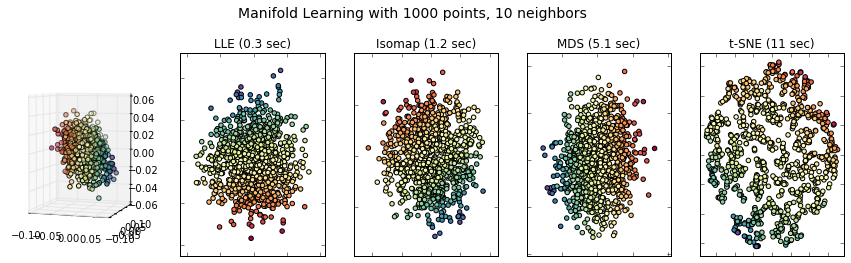

In [17]:
X = datasets.samples_generator.make_low_rank_matrix(n_samples=n_points,n_features=3,effective_rank=2,tail_strength=0)
color = X[:,0]
CalcLowdPresent(X,color,n_neighbors,n_components)

standard: 0.24 sec
Isomap: 1.1 sec
MDS: 6.4 sec
t-SNE: 13 sec


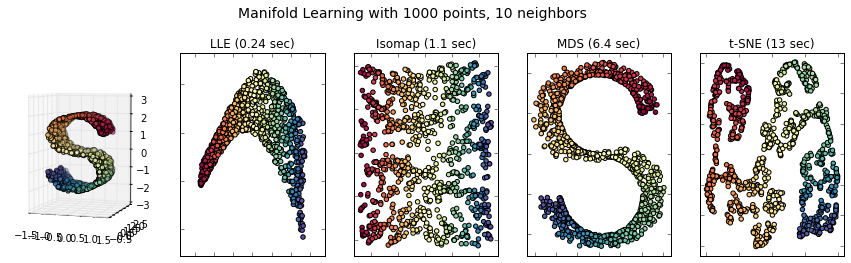

In [18]:
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
CalcLowdPresent(X,color,n_neighbors,n_components)

standard: 0.25 sec
Isomap: 1.1 sec
MDS: 6.4 sec
t-SNE: 10 sec


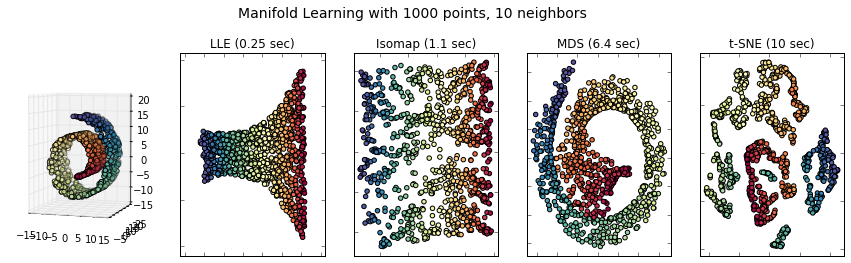

In [19]:
X, color = datasets.samples_generator.make_swiss_roll(n_points, random_state=0)
CalcLowdPresent(X,color,n_neighbors,n_components)


standard: 0.044 sec
Isomap: 0.019 sec
MDS: 0.18 sec
t-SNE: 5.4 sec


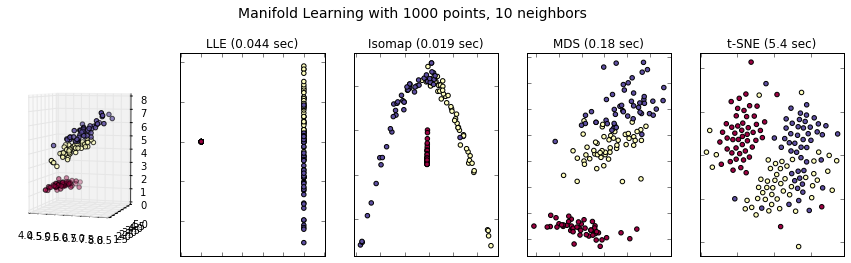

In [20]:
iris = datasets.load_iris()
X = iris.data
color = iris.target
CalcLowdPresent(X,color,n_neighbors,n_components)

(1797L, 64L)


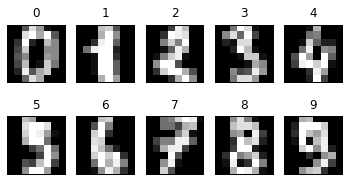

In [21]:
digits = load_digits()
X = digits.data
color=digits.target
print(X.shape)
#pl.gray()
#pl.matshow(digits.images[1]) 
#pl.show() 

nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

standard: 1.4 sec
Isomap: 5.3 sec
MDS: 21 sec
t-SNE: 43 sec


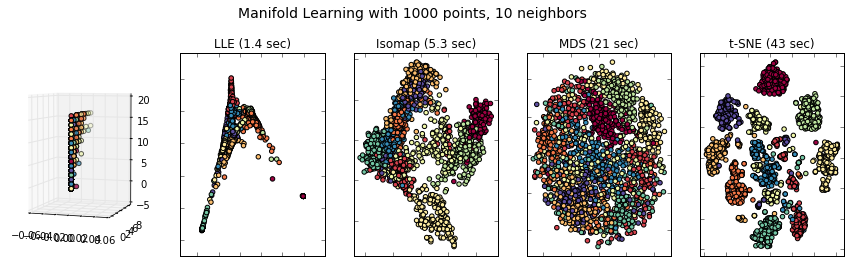

In [22]:
CalcLowdPresent(X,color,n_neighbors,n_components)